In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from pypinyin import pinyin,Style
import os
from hparams import hparams,hparams_debug_string
import tensorflow as tf
from synthesi import Synthesizer
from IPython.display import Audio
import librosa.display as ld
import soundfile as sf 
import sounddevice as sd
import librosa
import matplotlib
import seaborn
seaborn.set(style="whitegrid")
rcParams['figure.figsize'] = (16, 5)
rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
rcParams['axes.unicode_minus']=False

/Users/peak/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/peak/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
checkpoint='/Users/peak/Desktop/moxing/model.ckpt-70000'

In [4]:
sy=Synthesizer()

In [5]:
tf.reset_default_graph()
sy.load(checkpoint_path=checkpoint)

Constructing model: tacotron
Initialized Tacotron model. Dimensions: 
  embedding:               256
  prenet out:              128
  encoder out:             256
  attention out:           256
  concat attn & out:       512
  decoder cell out:        256
  decoder out (5 frames):  400
  decoder out (1 frame):   80
  postnet out:             256
  linear out:              1025
Loading checkpoint: /Users/peak/Desktop/moxing/model.ckpt-70000
INFO:tensorflow:Restoring parameters from /Users/peak/Desktop/moxing/model.ckpt-70000


In [6]:
x=input()

北京大学信息科学技术学院智能科学技术专业


In [7]:
x1=pinyin(x,style=Style.TONE3)

In [8]:
type(x1[0])
x2=[]

In [9]:
for i in range(0,len(x1)):
#     print(x1[i][-1][-1])
    if ord(x1[i][-1][-1])<=48 or ord(x1[i][-1][-1])>=57:
        x1[i][-1]= x1[i][-1]+'0'
for i in range(0,len(x1)):
    x2.append(x1[i][-1].replace('1','one').replace('2','two').replace('3','three').replace('4','four').replace('0','zero'))
#     if x1[i][-1][-1] == '1':
#         x1[i][-1][-1]='one'
#       print(type(x1[i][-1]))  
#     print(x1[i][-1][-1])
x3=" ".join(x2)   

In [10]:
sy.synthesize(x3)

In [11]:
[data,fs]=sf.read('/Users/peak/Desktop/tacotron/1.wav')

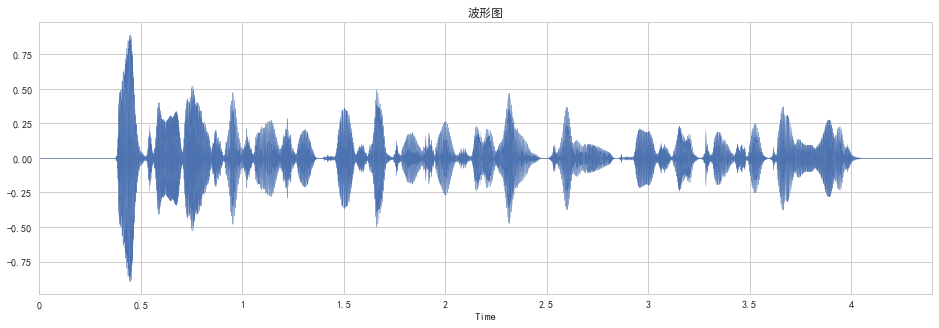

In [12]:
librosa.display.waveplot(data, sr=fs)
title("波形图")
Audio(data, rate=fs)